In [1]:
#Importing header files

import pandas as pd
from sklearn.model_selection import train_test_split

#Code starts here

#Loading of data
data=pd.read_csv('C:/Users/Pratik/Desktop/my codes/decision tree/file.csv')


#Dropping ID and Target
X=data.drop(['customer.id','paid.back.loan'],1)

#Copying the target
y=data['paid.back.loan'].copy()


#Splitting the data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#Code ends here

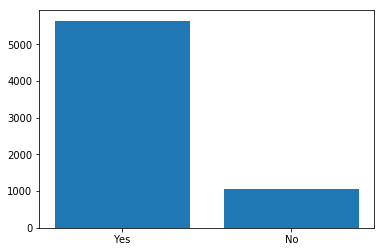

In [3]:
#Importing header files
import matplotlib.pyplot as plt


#Code starts here

#Storing value counts of target variable in 'fully_paid'
fully_paid=y_train.value_counts()

#Plotting bar plot
plt.bar(fully_paid.index, fully_paid)
plt.show()

#Code ends here

In [5]:
#Importing header files
import numpy as np
from sklearn.preprocessing import LabelEncoder


#Code starts here

#Removing the last character from the values in column
X_train['int.rate'] = X_train['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
X_train['int.rate']=X_train['int.rate'].astype(float)/100

#Removing the last character from the values in column
X_test['int.rate'] = X_test['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
X_test['int.rate']=X_test['int.rate'].astype(float)/100

#Storing all the numerical type columns in 'num_df'
num_df=X_train.select_dtypes(include=['number']).copy()

#Storing all the categorical type columns in 'cat_df'
cat_df=X_train.select_dtypes(include=['object']).copy()

#Code ends here


C:\Users\Pratik\Anaconda3\envs\greyatom\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Pratik\Anaconda3\envs\greyatom\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Pratik\Anaconda3\envs\greyatom\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

<Figure size 1440x1440 with 0 Axes>

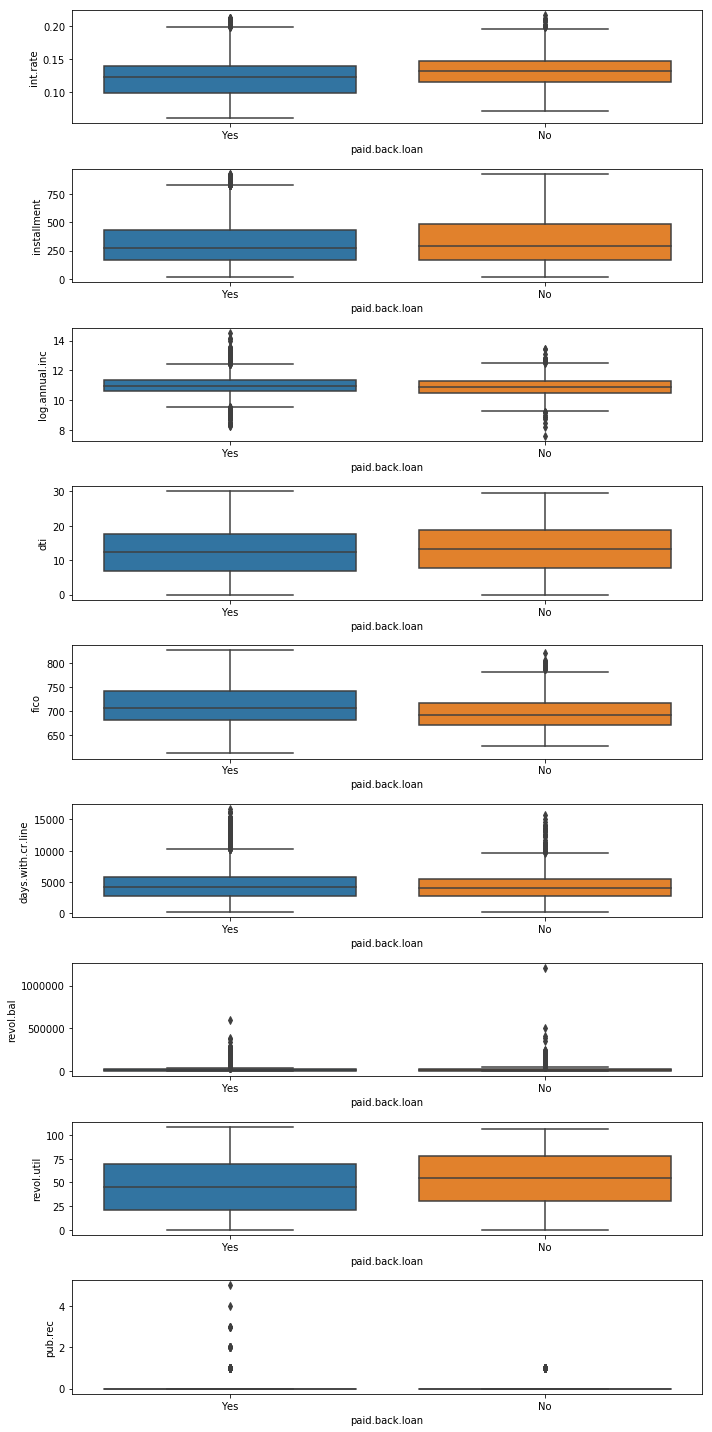

In [8]:
#Importing header files
import seaborn as sns

#Code starts here

#Setting the figure size
plt.figure(figsize=(20,20))


#Storing the columns of 'num_df'
cols=list(num_df.columns)


#Creating subplots
fig,axes=plt.subplots(9,1, figsize=(10,20))

#Looping across rows
for i in range(9):          
    
    #Plotting boxplot
    sns.boxplot(x=y_train,y=num_df[cols[i]],ax=axes[i])
    
    #Avoiding subplots overlapping
    fig.tight_layout()    

    
#Code ends here

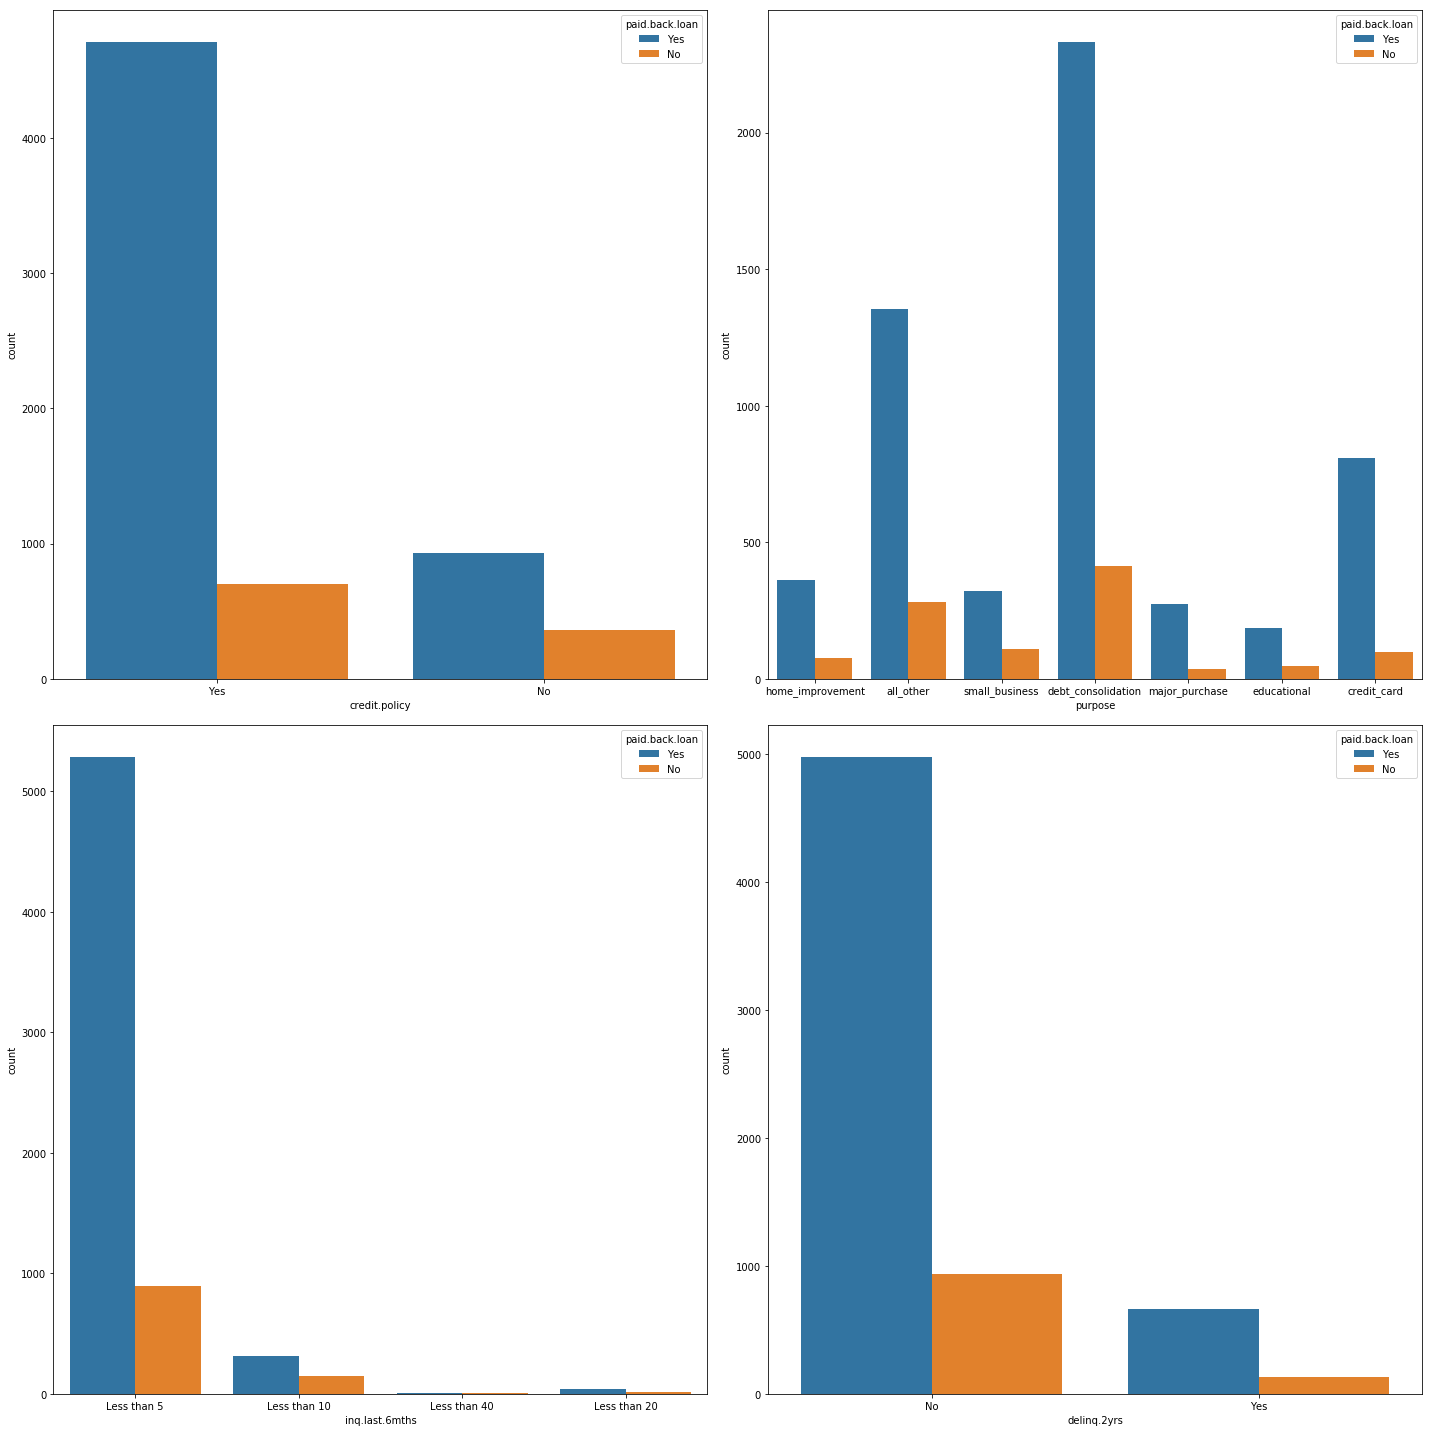

In [10]:
# Code starts here

#Let's plot and see the relation of categorical features with the target variable

# Code ends herec
#Code starts here

#Storing the columns of 'cat_df'
cols=list(cat_df.columns)

#Setting up subplots
fig,axes=plt.subplots(2,2, figsize=(20,20))

#Looping through rows
for i in range(0,2):
    
    #Looping through columns
    for j in range(0,2):
        
        #Plotting count plot
        sns.countplot(x=X_train[cols[i*2+j]], hue=y_train,ax=axes[i,j])                        
        
        #Avoiding subplots overlapping
        fig.tight_layout()    

#Code ends here

In [11]:
#Importing header files
from sklearn.tree import DecisionTreeClassifier

#Code starts here

#Looping through categorical columns
for col in cat_df.columns:
    
    #Filling null values with 'NA'
    X_train[col].fillna('NA',inplace=True)
    
    #Initalising a label encoder object
    le=LabelEncoder()
    
    #Fitting and transforming the column in X_train with 'le'
    X_train[col]=le.fit_transform(X_train[col]) 
    
    #Filling null values with 'NA'
    X_test[col].fillna('NA',inplace=True)
    
    #Fitting the column in X_test with 'le'
    X_test[col]=le.transform(X_test[col]) 

# Replacing the values of y_train
y_train.replace({'No':0,'Yes':1},inplace=True)

# Replacing the values of y_test
y_test.replace({'No':0,'Yes':1},inplace=True)

#Initialising 'Decision Tree' model    
model=DecisionTreeClassifier(random_state=0)

#Training the 'Decision Tree' model
model.fit(X_train, y_train)

#Finding the accuracy of 'Decision Tree' model
acc=model.score(X_test, y_test)

#Printing the accuracy
print(acc)

#Code ends here

C:\Users\Pratik\Anaconda3\envs\greyatom\lib\site-packages\pandas\core\generic.py:6120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Pratik\Anaconda3\envs\greyatom\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Pratik\Anaconda3\envs\greyatom\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

0.7334725121781489


In [12]:
#Importing header files
from sklearn.model_selection import GridSearchCV

#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

# Code starts here
model_2 = DecisionTreeClassifier(random_state=0)
p_tree = GridSearchCV(estimator=model_2,param_grid=parameter_grid,cv=5)
p_tree.fit(X_train,y_train)
acc_2 = p_tree.score(X_test,y_test)
print(acc_2)

# Code ends here

0.837160751565762
